In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [8]:
# Set up visualization style
sns.set(style="whitegrid")  # Use Seaborn's styling
plt.figure(figsize=(10, 6))  # Set default figure size

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
# Load the cleaned data
cleaned_data_path = "D:/ProjectCQ/Energy-consumption-prediction/energy-consumption-prediction/data/processed/cleaned_data.csv"
df = pd.read_csv(cleaned_data_path)

In [11]:
# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [12]:
# ================== Data Quality Checks ==================
print("\n" + "="*40 + " DATA QUALITY CHECKS " + "="*40)

# 1. Initial Data Inspection
print("\n[1/4] Dataset Info:")
df.info()

print("\n[2/4] First 5 rows:")
display(df.head())

print("\n[3/4] Summary Statistics:")
display(df.describe())

# 2. Missing Values Check
print("\n[4/4] Missing Values:")
print(df.isnull().sum())

# 3. Infinite Values Check
print("\nInfinite Values Check:")
print((df.select_dtypes(include=[np.number]) == np.inf).sum() + 
      (df.select_dtypes(include=[np.number]) == -np.inf).sum())


======================================== DATA QUALITY CHECKS ========================================

[1/4] Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2025-02-17 23:00:00 to 2025-02-22 20:00:00
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          40 non-null     float64
 1   humidity             40 non-null     float64
 2   wind_speed           40 non-null     float64
 3   weather_description  40 non-null     object 
dtypes: float64(3), object(1)
memory usage: 4.6+ KB

[2/4] First 5 rows:


,temperature,humidity,wind_speed,weather_description
timestamp,,,,
2025-02-17 23:00:00,2.031152,-1.562663,1.455588,few clouds
2025-02-18 00:00:00,NaN,NaN,NaN,NaN
2025-02-18 01:00:00,NaN,NaN,NaN,NaN
2025-02-18 02:00:00,1.859226,-1.202741,1.489701,scattered clouds
2025-02-18 03:00:00,NaN,NaN,NaN,NaN



[3/4] Summary Statistics:


,temperature,humidity,wind_speed
count,4.000000e+01,4.000000e+01,4.000000e+01
mean,3.608225e-17,1.932482e-16,8.326673e-17
std,1.012739e+00,1.012739e+00,1.012739e+00
min,-1.746812e+00,-2.162534e+00,-2.512115e+00
25%,-6.403142e-01,-8.428184e-01,-5.826298e-01
50%,-1.653135e-02,1.169748e-01,3.099790e-01
75%,6.535393e-01,7.468391e-01,7.036934e-01
max,2.031152e+00,1.796613e+00,1.734173e+00



[4/4] Missing Values:
temperature            78
humidity               78
wind_speed             78
weather_description    78
dtype: int64

Infinite Values Check:
temperature    0
humidity       0
wind_speed     0
dtype: int64


In [15]:
# ================== Data Cleaning ==================
print("\n" + "="*40 + " DATA CLEANING " + "="*40)

# 1. Handle remaining missing values
initial_count = len(df)
df_clean = df.dropna()
print(f"\nRemoved {initial_count - len(df_clean)} rows with missing values")

# 2. Handle infinite values
inf_count = (df_clean.select_dtypes(include=[np.number]) == np.inf).sum().sum() + (df_clean.select_dtypes(include=[np.number]) == -np.inf).sum().sum()
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna()
print(f"Removed {inf_count} infinite values")
# Final check
print("\nFinal Data Quality:")
print(f"- Total rows: {len(df_clean)}")
print("- Remaining missing values:", df_clean.isnull().sum().sum())
print("- Remaining infinite values:", ((df_clean.select_dtypes(include=[np.number]) == np.inf).sum().sum() + 
                                     (df_clean.select_dtypes(include=[np.number]) == -np.inf).sum().sum()))


======================================== DATA CLEANING ========================================

Removed 78 rows with missing values
Removed 0 infinite values

Final Data Quality:
- Total rows: 40
- Remaining missing values: 0
- Remaining infinite values: 0


In [16]:
# ================== Visualization ==================
print("\n" + "="*40 + " VISUALIZATION " + "="*40)

def plot_time_series(data, columns, title, ylabel):
    """Plot time-series data with proper formatting"""
    plt.figure(figsize=(14, 6))
    for col in columns:
        plt.plot(data.index, data[col], label=col)
    plt.title(title, fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


======================================== VISUALIZATION ========================================



Plotting time-series trends...


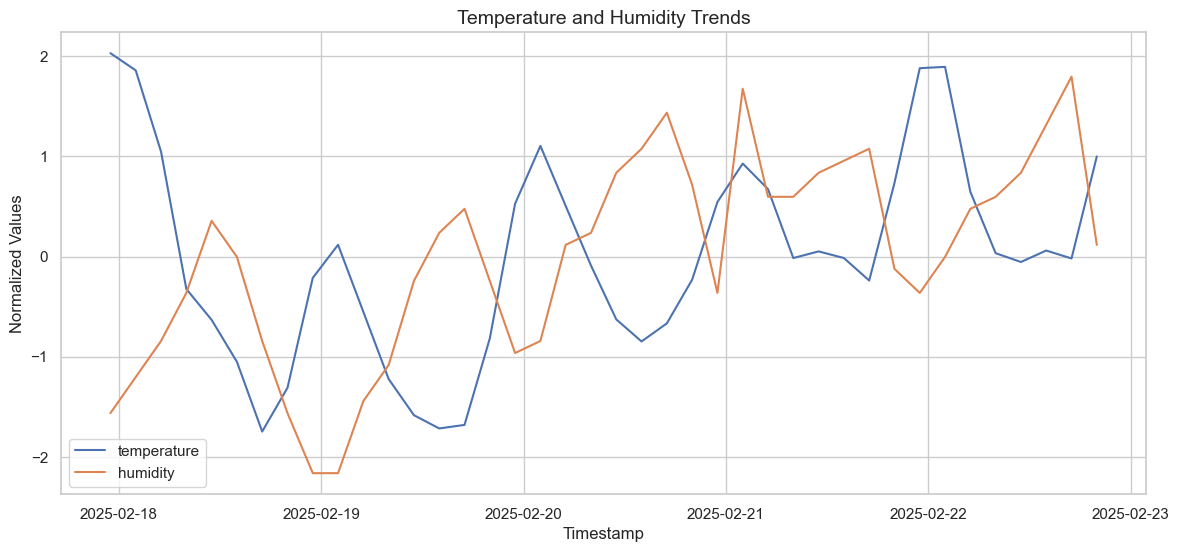

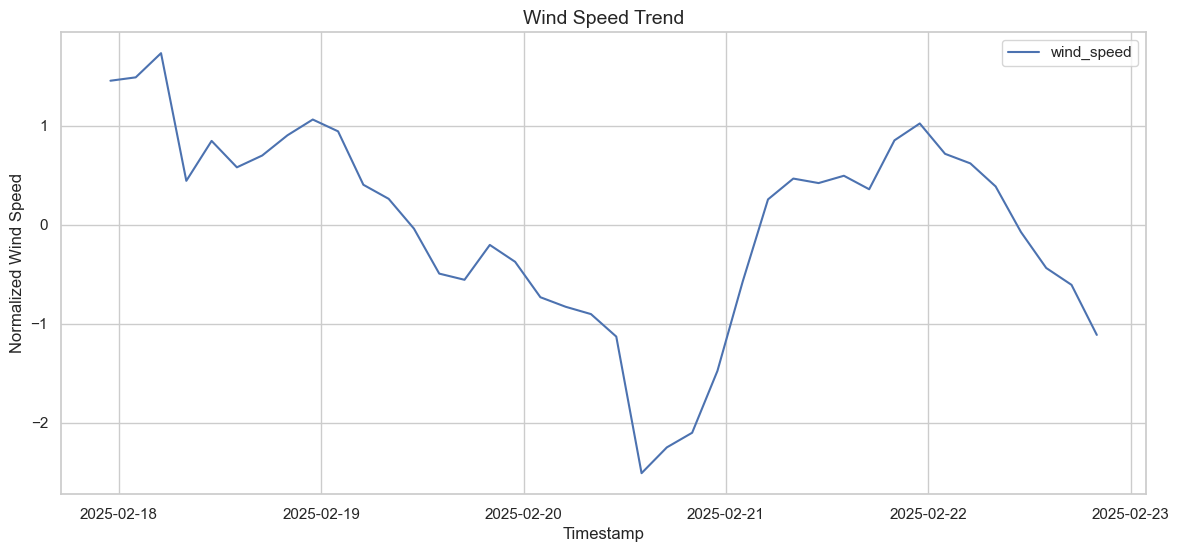

In [17]:
# Time-series plots
print("\nPlotting time-series trends...")
plot_time_series(df_clean, ['temperature', 'humidity'], 
                'Temperature and Humidity Trends', 'Normalized Values')
plot_time_series(df_clean, ['wind_speed'], 
                'Wind Speed Trend', 'Normalized Wind Speed')


Plotting distributions...


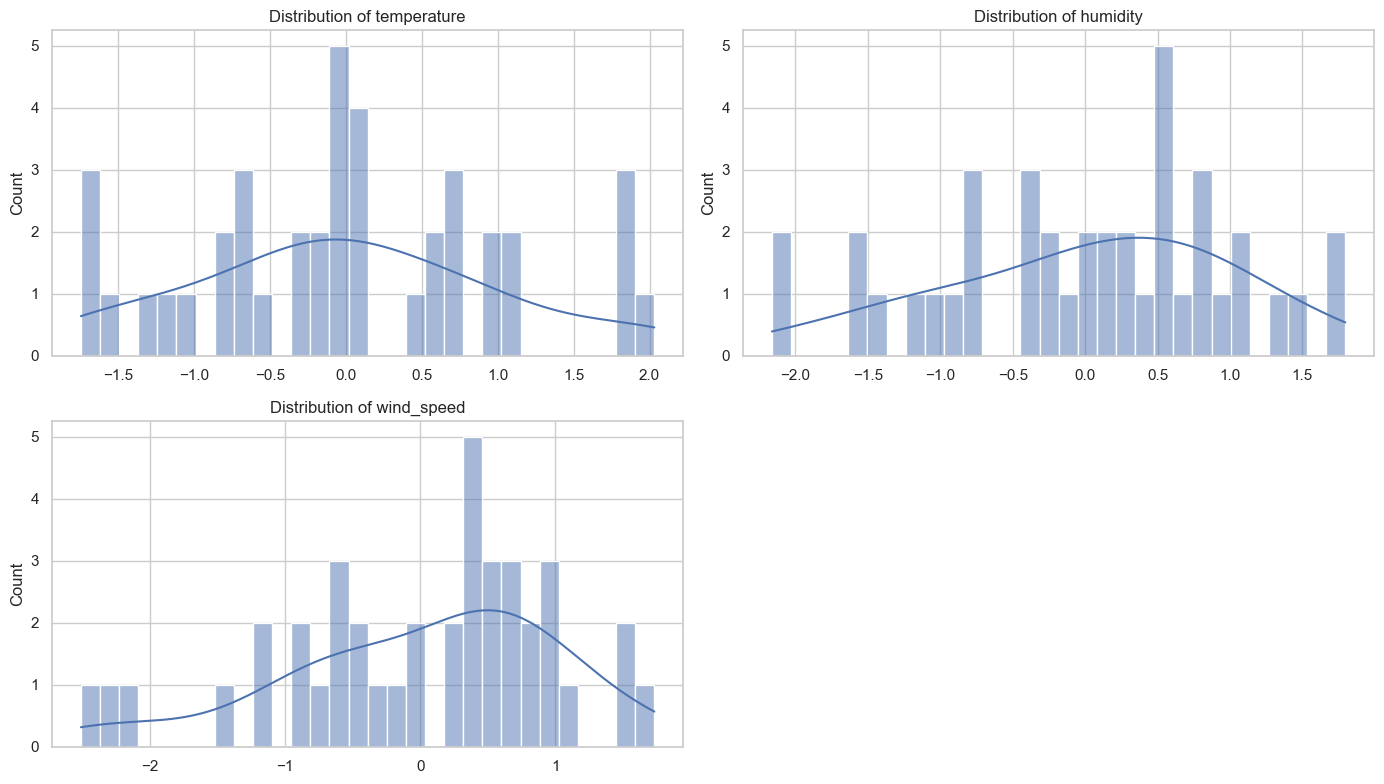

In [19]:
# Distribution analysis
def plot_distributions(data, columns):
    """Plot distribution histograms with KDE"""
    plt.figure(figsize=(14, 8))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel('')
    plt.tight_layout()
    plt.show()
    
print("\nPlotting distributions...")
plot_distributions(df_clean, ['temperature', 'humidity', 'wind_speed'])


Plotting correlation heatmap...


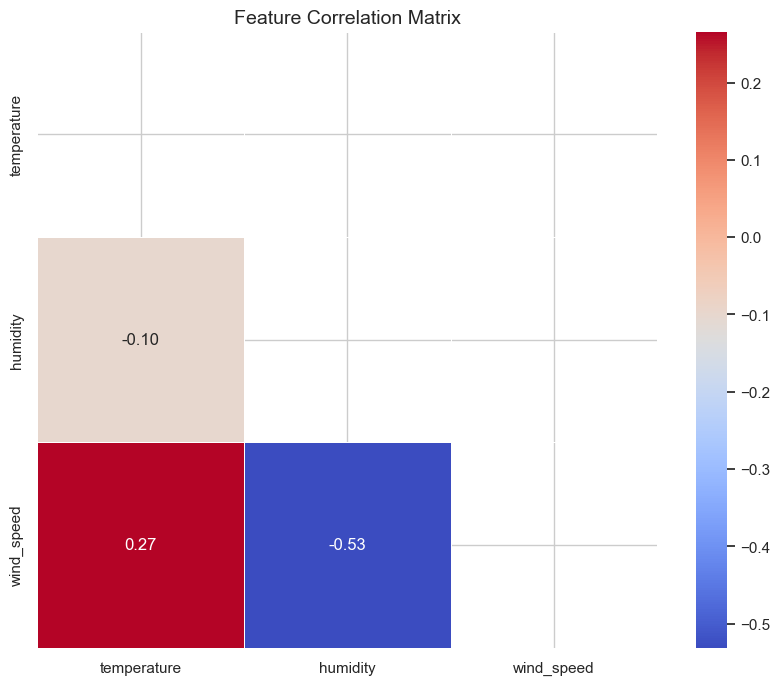

In [20]:
# Correlation analysis
def plot_correlation_heatmap(data):
    """Plot correlation matrix with annotations"""
    plt.figure(figsize=(10, 8))
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
               fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Matrix', fontsize=14)
    plt.show()

print("\nPlotting correlation heatmap...")
plot_correlation_heatmap(df_clean[['temperature', 'humidity', 'wind_speed']])

In [22]:
# ================== Statistical Analysis ==================
print("\n" + "="*40 + " STATISTICAL ANALYSIS " + "="*40)

def check_stationarity(series, column_name):
    """Enhanced stationarity check with error handling"""
    # Clean series
    clean_series = series.dropna()
    
    if len(clean_series) < 2:
        print(f"\n⚠️ Cannot perform ADF test on {column_name} - insufficient data")
        return
    
    try:
        result = adfuller(clean_series)
        print(f"\nADF Test for {column_name}:")
        print(f"- ADF Statistic: {result[0]:.4f}")
        print(f"- p-value: {result[1]:.4f}")
        print("- Critical Values:")
        for key, value in result[4].items():
            print(f"   {key}: {value:.4f}")
            
        if result[1] <= 0.05:
            print(f"✅ {column_name} is stationary (p < 0.05)")
        else:
            print(f"❌ {column_name} is non-stationary")
            
    except Exception as e:
        print(f"\nError in ADF test for {column_name}: {str(e)}")
        
# Perform stationarity checks
print("\nRunning stationarity checks...")
for col in ['temperature', 'humidity', 'wind_speed']:
    check_stationarity(df_clean[col], col)


======================================== STATISTICAL ANALYSIS ========================================

Running stationarity checks...

ADF Test for temperature:
- ADF Statistic: -1.4036
- p-value: 0.5806
- Critical Values:
   1%: -3.6614
   5%: -2.9605
   10%: -2.6193
❌ temperature is non-stationary

ADF Test for humidity:
- ADF Statistic: -2.5829
- p-value: 0.0966
- Critical Values:
   1%: -3.6104
   5%: -2.9391
   10%: -2.6081
❌ humidity is non-stationary

ADF Test for wind_speed:
- ADF Statistic: -1.9047
- p-value: 0.3298
- Critical Values:
   1%: -3.6155
   5%: -2.9413
   10%: -2.6092
❌ wind_speed is non-stationary



======================================== OUTLIER ANALYSIS ========================================

Plotting boxplots with outlier visualization...


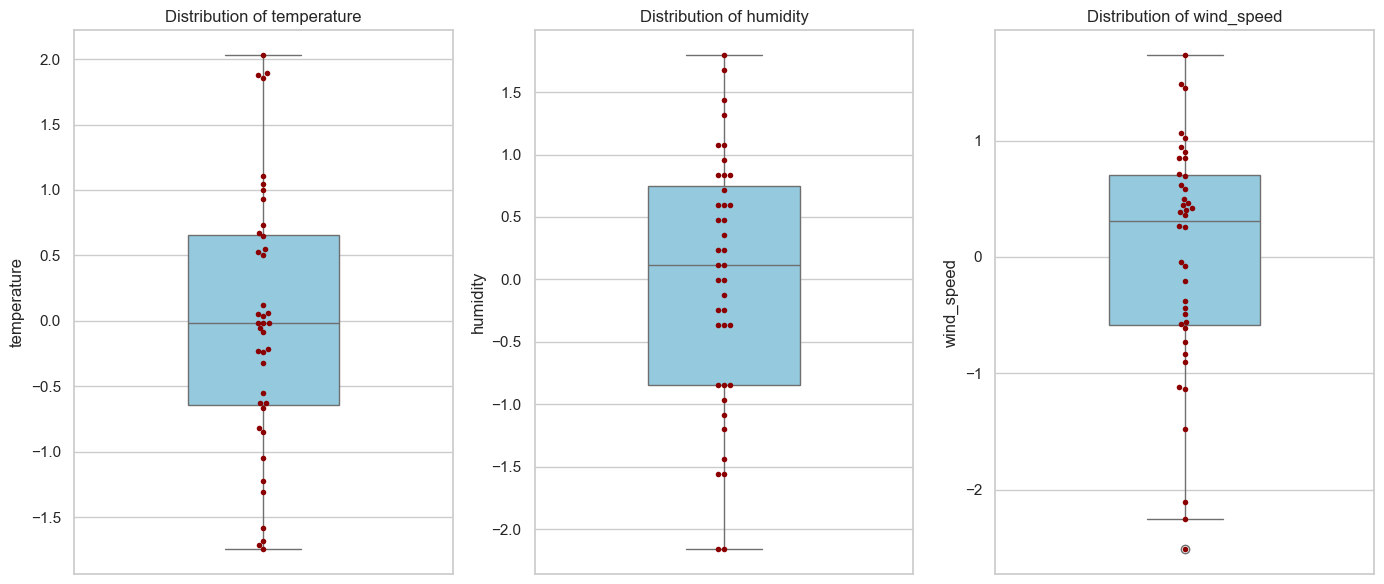

In [23]:
print("\n" + "="*40 + " OUTLIER ANALYSIS " + "="*40)

def plot_boxplots(data, columns):
    """Plot enhanced boxplots with swarmplot overlay"""
    plt.figure(figsize=(14, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=data[col], color='skyblue', width=0.4)
        sns.swarmplot(y=data[col], color='darkred', size=4)
        plt.title(f'Distribution of {col}', fontsize=12)
    plt.tight_layout()
    plt.show()

print("\nPlotting boxplots with outlier visualization...")
plot_boxplots(df_clean, ['temperature', 'humidity', 'wind_speed'])



======================================== MULTIVARIATE ANALYSIS ========================================

Plotting multivariate relationships...


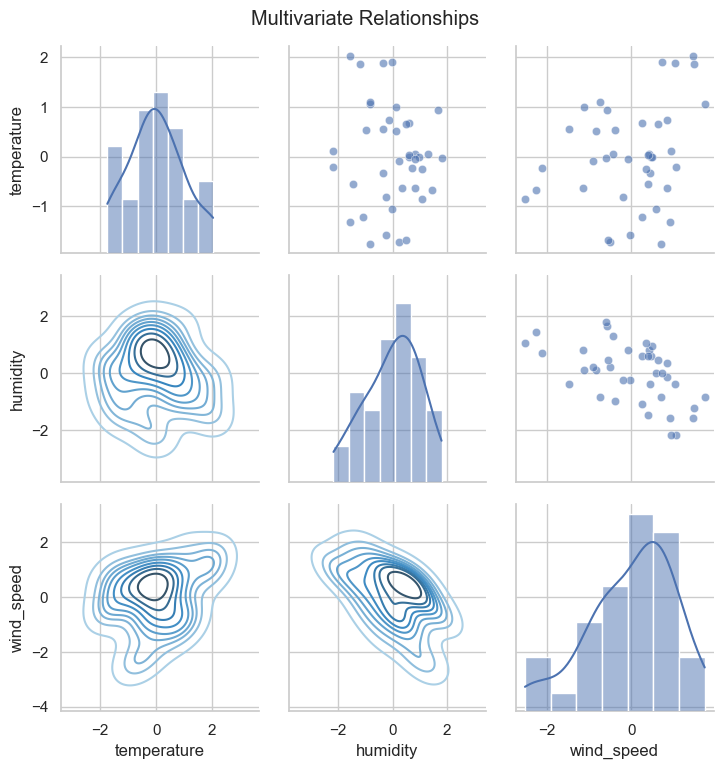


✅ EDA Completed Successfully!


In [24]:
# ================== Multivariate Analysis ==================
print("\n" + "="*40 + " MULTIVARIATE ANALYSIS " + "="*40)

def plot_pairgrid(data):
    """Enhanced pairplot with regression lines"""
    g = sns.PairGrid(data)
    g.map_upper(sns.scatterplot, alpha=0.6)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_diag(sns.histplot, kde=True)
    g.fig.suptitle('Multivariate Relationships', y=1.02)
    plt.show()

print("\nPlotting multivariate relationships...")
plot_pairgrid(df_clean[['temperature', 'humidity', 'wind_speed']])

print("\n✅ EDA Completed Successfully!")